In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
import matplotlib.pyplot as plt

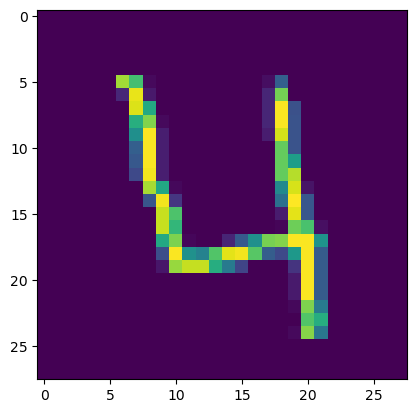

In [8]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28))

In [9]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [14]:
Y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)


In [20]:
X_traint = pca.fit_transform(X_train)
X_testt = pca.fit_transform(X_test)

In [21]:
X_traint.shape

(33600, 100)

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_traint,Y_train)

KNeighborsClassifier()

In [23]:
Y_pred = knn.predict(X_testt)

In [24]:
accuracy_score(Y_test,Y_pred)

0.6826190476190476

In [25]:
scores=[]
for i in range(1,20):
    pca = PCA(n_components=i)
    X_traint = pca.fit_transform(X_train)
    X_testt = pca.fit_transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_traint,Y_train)
    Y_pred = knn.predict(X_testt)
    scores.append(accuracy_score(Y_test,Y_pred))

In [26]:
pca = PCA(n_components=2)

In [27]:
X_traint = pca.fit_transform(X_train)
X_testt = pca.fit_transform(X_test)

In [29]:
import plotly.express as px
Y_traint = Y_train.astype(str)
fig = px.scatter(x=X_traint[:,0],
                y=X_traint[:,1],
                color=Y_traint,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [31]:
pca = PCA(n_components=3)

In [32]:
X_traint = pca.fit_transform(X_train)
X_testt = pca.fit_transform(X_test)

In [33]:
Y_traint = Y_train.astype(str)
fig = px.scatter_3d(df,x=X_traint[:,0],
                y=X_traint[:,1],
                z=X_traint[:,2],
                color=Y_traint,
                )
fig.update_layout(
margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [34]:
pca.explained_variance_
#eigen values

array([40.87278367, 28.96628007, 27.04279074])

In [36]:
pca.components_.shape

(3, 784)

In [37]:
pca.components_

array([[-1.11967868e-17, -5.84958786e-18,  3.87389857e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.92284566e-17,  7.58664398e-18, -3.34962934e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.79917388e-17,  3.45819500e-17, -4.35618815e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [39]:
pca.explained_variance_ratio_

array([0.06054506, 0.0429079 , 0.04005862])

In [40]:
pca = PCA(n_components=None)

In [41]:
X_traint = pca.fit_transform(X_train)
X_testt = pca.fit_transform(X_test)

In [42]:
pca.explained_variance_.shape

(784,)

In [43]:
pca.components_.shape

(784, 784)

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

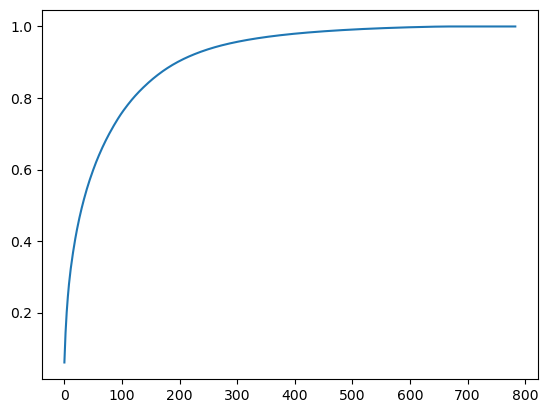

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))